# Data 201: Project 2 
#### Isabel Decolin 

For this project I am using a data set about insurance from kaggle(https://www.kaggle.com/teertha/ushealthinsurancedataset?select=insurance.csv). This dataset contains the insurance information for a certain number of individuals. For each individual it describes how many children they have (dependents), body mass index (BMI), age, what region of the country they live in and how much they're charged by their insurer.  

#### Questions
- Which regions spend the most money on insurance? 
- Which factor has the most effect on insurnace payment: BMI or being a smoker? 
- Is cost dependent on age or sex? 

## Install Packages 


In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os


## Load Dataset 

In [2]:
sure = pd.read_csv("/Users/idecolin/insurance.csv")
print(sure.head(5))
print(sure.info())
sure.describe()
sure.shape

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


(1338, 7)

## Data Cleaning 

In [3]:
# confirm that the dataset is free of any null values 
sure.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#round bmi and charges to two decimal places 
cols = ['bmi', 'charges']
sure[cols] = sure[cols].round(2)
print(sure.head(2))

   age     sex    bmi  children smoker     region   charges
0   19  female  27.90         0    yes  southwest  16884.92
1   18    male  33.77         1     no  southeast   1725.55


## Analysis 

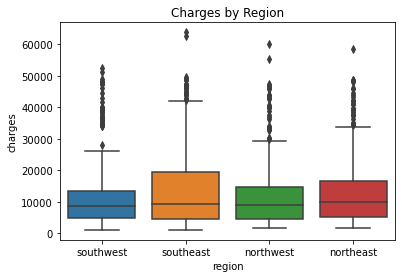

In [5]:
# which region has the most charges 
sns.boxplot(x="region",
 y="charges",
 data=sure)
plt.title('Charges by Region')
plt.show()

Southeast region has the most insurance charges. 


Southeast states:  Alabama, Arkansas, Delaware, the District of Columbia, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, and West Virginia.
(source: https://www.britannica.com/place/the-South-region)

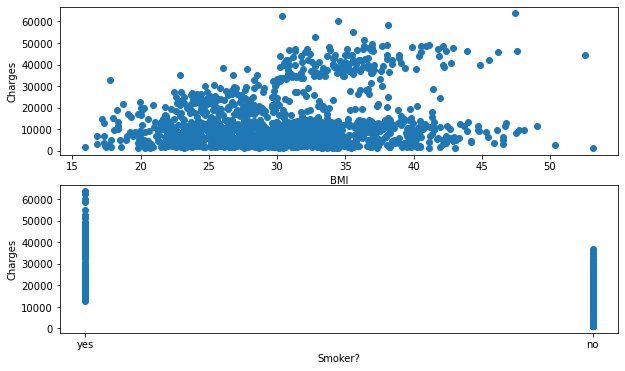

In [6]:
# Charges in regards to BMI and smoker status 
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = sure['bmi'], y = sure['charges'])
ax[0].set_xlabel("BMI")
ax[0].set_ylabel("Charges")

ax[1].scatter(x = sure['smoker'], y = sure['charges'])
ax[1].set_xlabel("Smoker?")
ax[1].set_ylabel("Charges")

plt.show()

In [7]:
#answer question by turning smoker column into numbers 
sure['smoker']= sure['smoker'].map({'yes':1 ,'no':0})
print(sure.head(4))

   age     sex    bmi  children  smoker     region   charges
0   19  female  27.90         0       1  southwest  16884.92
1   18    male  33.77         1       0  southeast   1725.55
2   28    male  33.00         3       0  southeast   4449.46
3   33    male  22.70         0       0  northwest  21984.47


In [8]:
sure.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109275,0.042469,-0.025019,0.299008
bmi,0.109275,1.000000,0.012766,0.003744,0.198331
children,0.042469,0.012766,1.000000,0.007673,0.067998
smoker,-0.025019,0.003744,0.007673,1.000000,0.787251
charges,0.299008,0.198331,0.067998,0.787251,1.000000


Being a smoker has a greater affect on charges than an indivdual's BMI as representated in its highter postive correlation. 

## Logistic Regression 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

In [10]:
#Smoker column already converted to be used as y. Remove columns that don't have numbers, rearrange y to the end 
sure_reg = sure[["age", "bmi", "children", "charges", "smoker"]]

In [11]:
sure_reg.head(5)

,age,bmi,children,charges,smoker
0,19,27.90,0,16884.92,1
1,18,33.77,1,1725.55,0
2,28,33.00,3,4449.46,0
3,33,22.70,0,21984.47,0
4,32,28.88,0,3866.86,0


Smoker = 1 

Non-smoker = 0 

In [12]:
X = sure_reg.iloc[:,0:3] 
y = sure_reg.smoker 

In [13]:
X.head(5)

,age,bmi,children
0,19,27.90,0
1,18,33.77,1
2,28,33.00,3
3,33,22.70,0
4,32,28.88,0


In [14]:
sure_reg['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

Non-smokers: 1064

Smokers: 274

In [15]:
sure_reg.groupby('smoker').mean().round(2)

,age,bmi,children,charges
smoker,,,,
0,39.39,30.65,1.09,8434.27
1,38.51,30.71,1.11,32050.23


Despite having the least number of individuals in the group, smokers average more dependents, a greater BMI and vastly more insurance charges. 

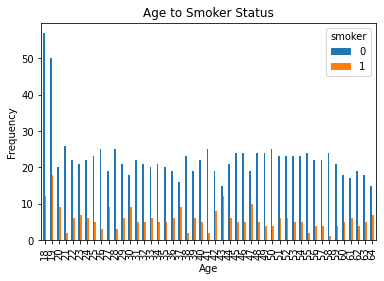

In [16]:
#Age a good predictor of the outcome variable? 
%matplotlib inline
pd.crosstab(sure_reg.age,sure_reg.smoker).plot(kind='bar')
plt.title('Age to Smoker Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_smoke')

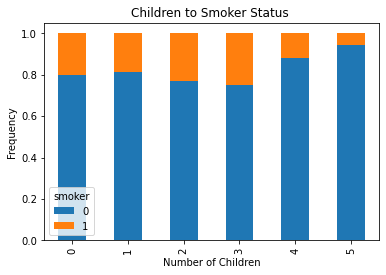

In [17]:
#Children  a good predictor of the outcome variable?
table=pd.crosstab(sure_reg.children,sure_reg.smoker)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Children to Smoker Status ')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.savefig('kid_smoke')


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1000)

In [19]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [20]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )


Classes [0 1]
Intercept [-1.42354234]
Coefficients [[-0.06439511 -0.01958704  0.04260152]]


In [23]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))
import warnings 
warnings.filterwarnings("ignore")

Accuracy 0.764179104477612
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       256
           1       0.00      0.00      0.00        79

    accuracy                           0.76       335
   macro avg       0.38      0.50      0.43       335
weighted avg       0.58      0.76      0.66       335



One class is more established than the other. Class 1 has 0 precision and 0 recall while class 0 has nearly perfect precision and recall. The greater support value for class 0 just shows the imbalance of the the dataset. 

In [22]:
con = confusion_matrix(y_test, y_pred)
con

array([[256,   0],
       [ 79,   0]])

Ultimately, using the smoker column as Y lead to poor predictor outcomes. The logistic classification is only predicting one class and not giving any other outcome a chance. 